<a href="https://colab.research.google.com/github/afeefa2023/Data-Analysis-Projects/blob/main/Delhi_Metro_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#INTRODUCTION
'''Examining the network of metro systems to comprehend its composition,
efficacy, and efficiency is known as metro network analysis. Analyzing routes, stations, traffic, connectivity,
and other operational factors are usually included. Thus, this post is for you if you want to understand how to examine the metro network in a city.'''

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
data=pd.read_csv('/content/Delhi-Metro-Network.csv')
data

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260
...,...,...,...,...,...,...,...,...
280,281,Bata Chowk,38.3,Voilet line,2015-06-09,Elevated,28.385836,77.313462
281,282,Dwarka Sector 12,5.8,Blue line,2006-01-04,Elevated,28.592320,77.040510
282,283,Noida Sector 18,43.6,Blue line,2009-12-11,Elevated,28.570810,77.326120
283,284,Knowledge Park II,21.4,Aqua line,2019-01-25,Elevated,28.456867,77.500054


In [3]:
data.columns

Index(['Station ID', 'Station Name', 'Distance from Start (km)', 'Line',
       'Opening Date', 'Station Layout', 'Latitude', 'Longitude'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Station ID                285 non-null    int64  
 1   Station Name              285 non-null    object 
 2   Distance from Start (km)  285 non-null    float64
 3   Line                      285 non-null    object 
 4   Opening Date              285 non-null    object 
 5   Station Layout            285 non-null    object 
 6   Latitude                  285 non-null    float64
 7   Longitude                 285 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.9+ KB


In [7]:
data.describe()

,Station ID,Distance from Start (km),Latitude,Longitude
count,285.000000,285.000000,285.000000,285.000000
mean,143.000000,19.218947,28.595428,77.029315
std,82.416625,14.002862,0.091316,2.875400
min,1.000000,0.000000,27.920862,28.698807
25%,72.000000,7.300000,28.545828,77.107130
50%,143.000000,17.400000,28.613453,77.207220
75%,214.000000,28.800000,28.666360,77.281165
max,285.000000,52.700000,28.878965,77.554479


In [8]:
data.head()

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260


In [9]:
data.tail()

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
280,281,Bata Chowk,38.3,Voilet line,2015-06-09,Elevated,28.385836,77.313462
281,282,Dwarka Sector 12,5.8,Blue line,2006-01-04,Elevated,28.592320,77.040510
282,283,Noida Sector 18,43.6,Blue line,2009-12-11,Elevated,28.570810,77.326120
283,284,Knowledge Park II,21.4,Aqua line,2019-01-25,Elevated,28.456867,77.500054
284,285,Mayur Vihar Extention,39.5,Blue line,2009-12-11,Elevated,28.594158,77.294589


In [10]:
data.isnull().sum()

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64

In [14]:
df_type=data.dtypes
df_type

Station ID                    int64
Station Name                 object
Distance from Start (km)    float64
Line                         object
Opening Date                 object
Station Layout               object
Latitude                    float64
Longitude                   float64
dtype: object

In [17]:
open_dats = data['Opening Date'].head(10)

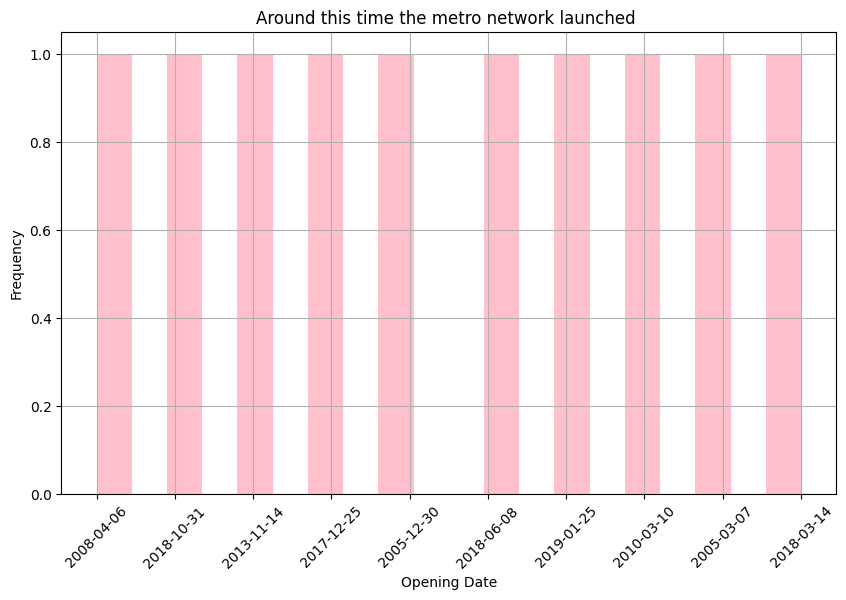

In [26]:
plt.figure(figsize=(10,6))
plt.hist(open_dats, bins=20, color='pink')
plt.xlabel('Opening Date')
plt.ylabel('Frequency')
plt.title('Around this time the metro network launched ')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [28]:
line_counts = data['Line'].value_counts()

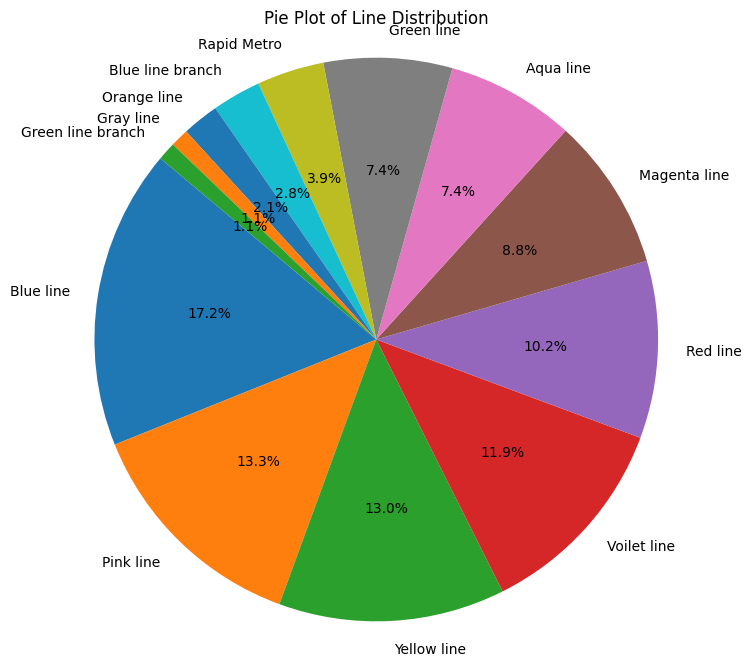

In [29]:
plt.figure(figsize=(8, 8))
plt.pie(line_counts, labels=line_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Plot of Line Distribution')
plt.axis('equal')
plt.show()

In [30]:
latitude = data['Latitude']
longitude = data['Longitude']

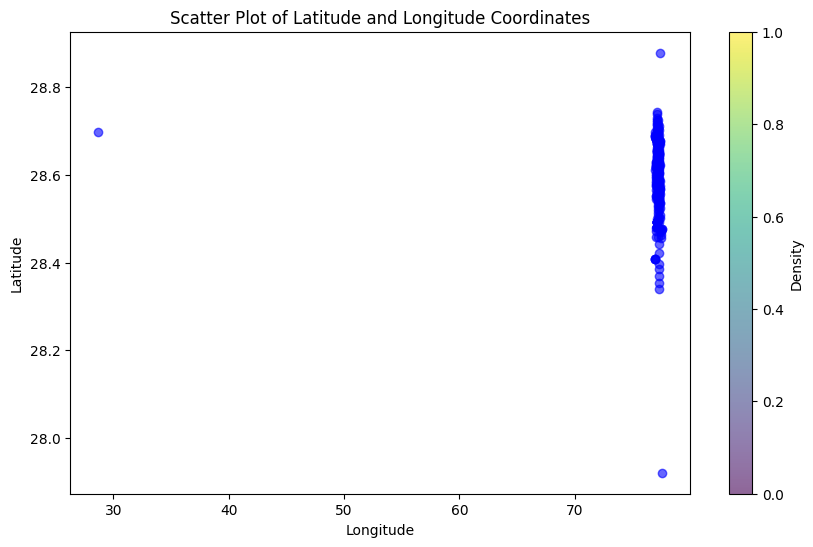

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c='blue', alpha=0.6)
plt.colorbar(label='Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude and Longitude Coordinates')
plt.show()

In [40]:
la_count= data['Station Layout'].value_counts()

In [42]:
data.rename(columns={'Number_Of_Stations': 'Number of Stations'}, inplace=True)

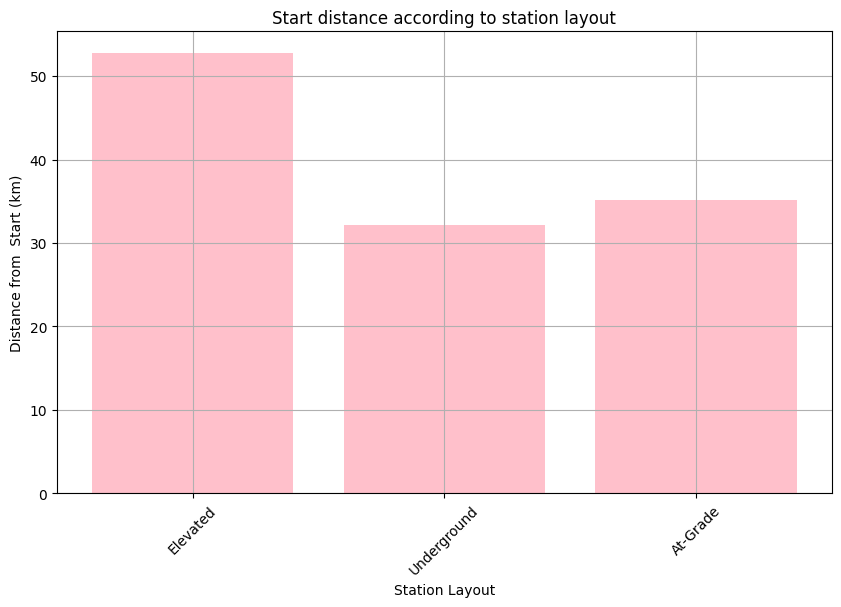

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(data['Station Layout'],data['Distance from Start (km)'],color='pink')
plt.xlabel('Station Layout')
plt.ylabel('Distance from  Start (km)')
plt.title('Start distance according to station layout')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()